In [16]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Définir le chemin vers le fichier de base de données
db_file = 'base de données/astronautes_import.db'
output_folder = 'pictures'

In [18]:
# Créer une connexion vers la base de données
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)

In [19]:
# Requête SQL
query = """
    WITH nationality_counts AS (
        SELECT nationality_cleaned, COUNT(*) AS effectif_tot
        FROM dbp_nationalites
        GROUP BY nationality_cleaned
    )
    SELECT dpc.birth_year, dpc.nationality_cleaned, nc.effectif_tot
    FROM dbp_nationalites dpc
    JOIN nationality_counts nc
    ON dpc.nationality_cleaned = nc.nationality_cleaned;
"""

In [20]:
c_df = pd.read_sql_query(query, cn)  # Charger les données avant de fermer la connexion
cn.close()  # Fermer la connexion aprè

In [21]:
# Supprimer les lignes avec des valeurs nulles ou des noms vides
c_df = c_df.dropna(subset=['nationality_cleaned', 'birth_year'])
c_df = c_df[c_df['nationality_cleaned'].str.strip() != '']  # Enlever les valeurs vides ou espaces

# Aperçu des données

In [22]:
print(c_df.head())

   birth_year nationality_cleaned  effectif_tot
0        1934             Russian           164
1        1934             Russian           164
2        1934             Russian           164
3        1934             Russian           164
4        1934             Russian           164


In [23]:
print(c_df.birth_year.min(), c_df.birth_year.max())

1934 1988


In [24]:
c_df = c_df[c_df.effectif_tot > 10].sort_values(by=['nationality_cleaned', 'birth_year'])

In [25]:
dc_df = c_df[['nationality_cleaned', 'effectif_tot']].drop_duplicates().set_index('nationality_cleaned')

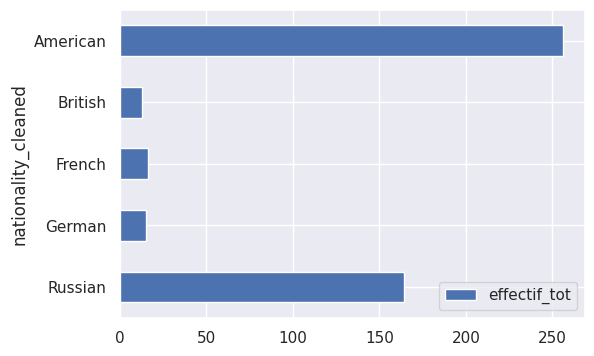

In [26]:
dc_df.sort_index(ascending=False).plot(kind='barh', figsize=(6, 4))
plt.show()

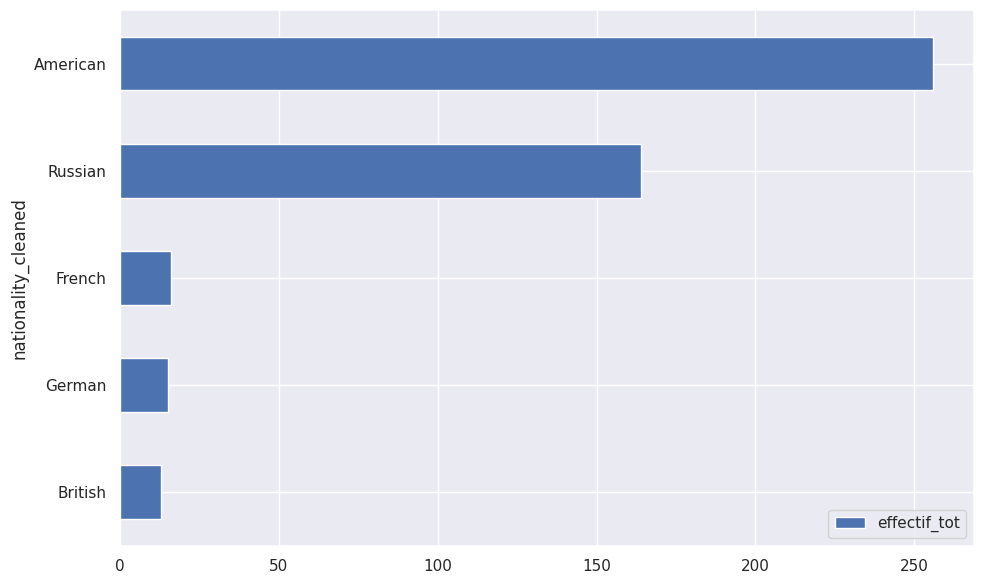

In [27]:

# Tri des données et création du graphique
dc_df.sort_values(by='effectif_tot').plot(kind='barh', figsize=(10, 6))

# Ajuster les marges pour éviter les coupures
plt.tight_layout()

# Sauvegarde du graphique avant d'afficher
plt.savefig('pictures/graphique_barh.png', format='png', dpi=300)

# Affichage du graphique
plt.show()




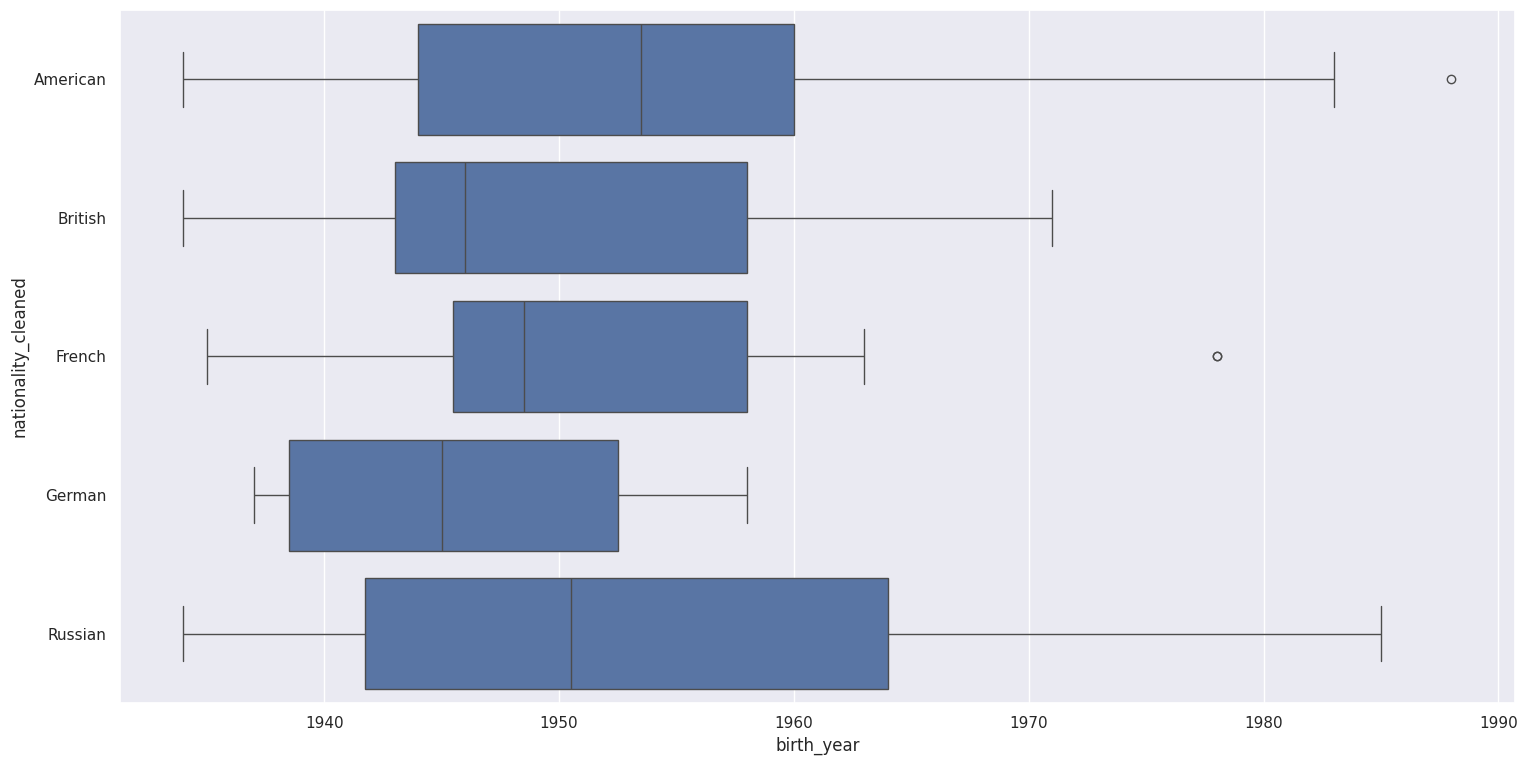

In [28]:
sns.set_theme(rc={'figure.figsize': (18, 9)})
sns.boxplot(y=c_df["nationality_cleaned"], x=c_df.birth_year)

# Sauvegarder l'image dans le dossier 'pictures'
plt.savefig('pictures/graphique_boxplot.png', format='png')

plt.show()


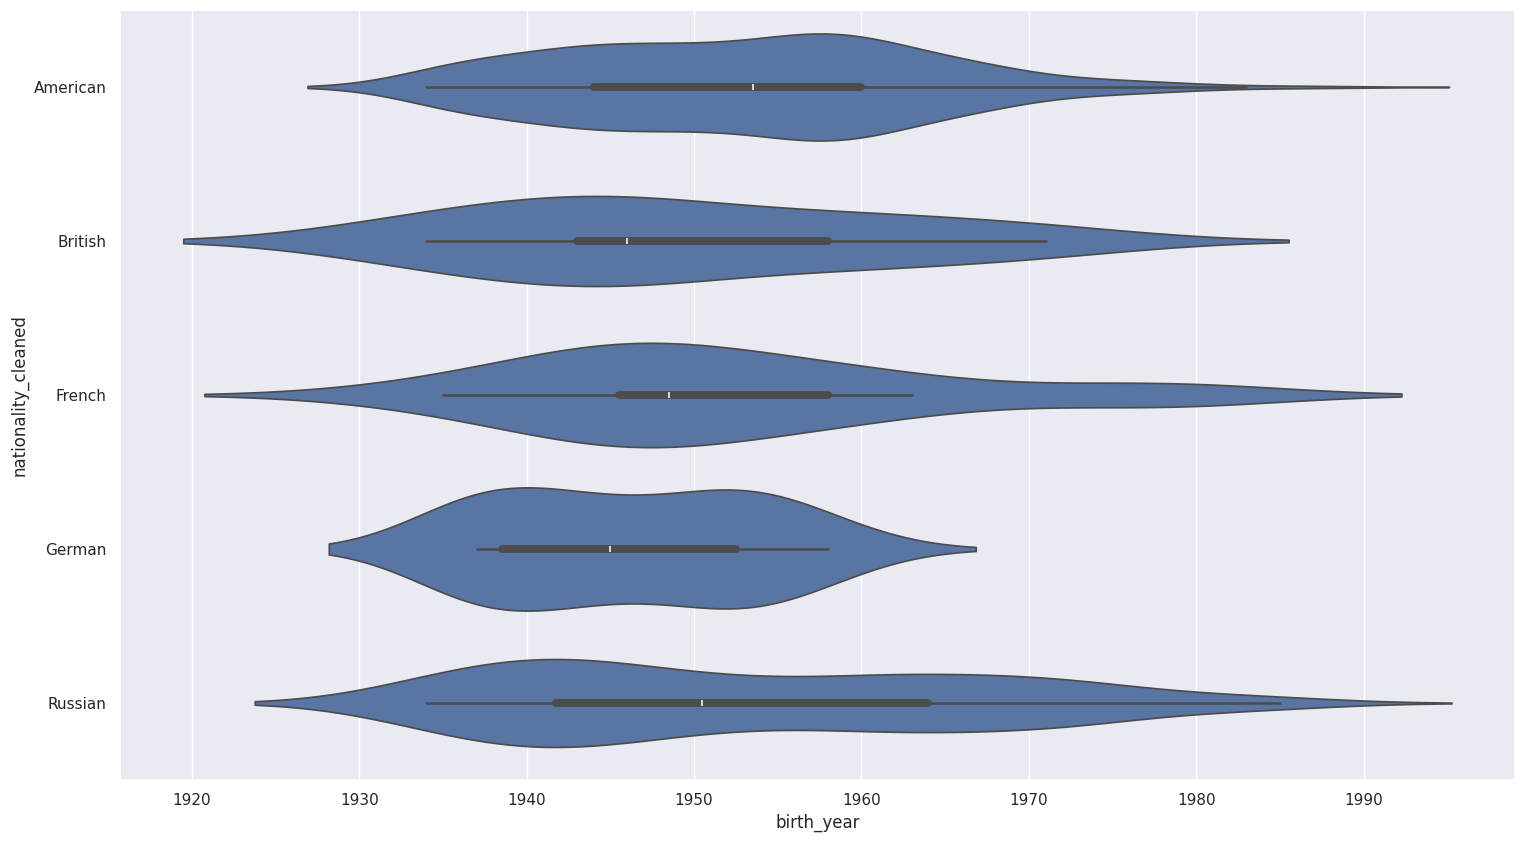

In [29]:
sns.set_theme(rc={'figure.figsize': (18, 10)})
sns.violinplot(y='nationality_cleaned', x='birth_year', data=c_df)

# Sauvegarder l'image dans le dossier 'pictures'
plt.savefig('pictures/graphique_violinplot.png', format='png')

plt.show()

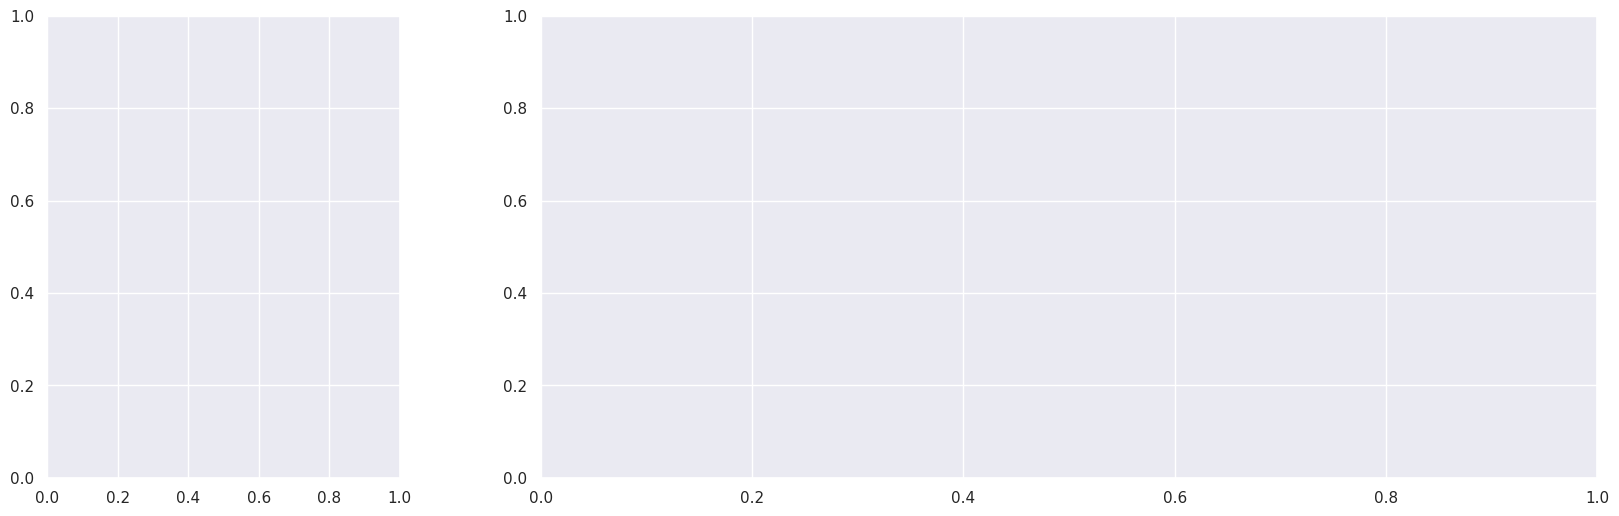

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6), width_ratios=[1, 3])

In [31]:
dc_df.sort_index(ascending=False).plot(kind='barh', figsize=(12, 6), ax=ax1)

<Axes: ylabel='nationality_cleaned'>

/tmp/ipykernel_121/2036573504.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax2 = sns.violinplot(y='nationality_cleaned', x='birth_year', data=c_df, scale='count')


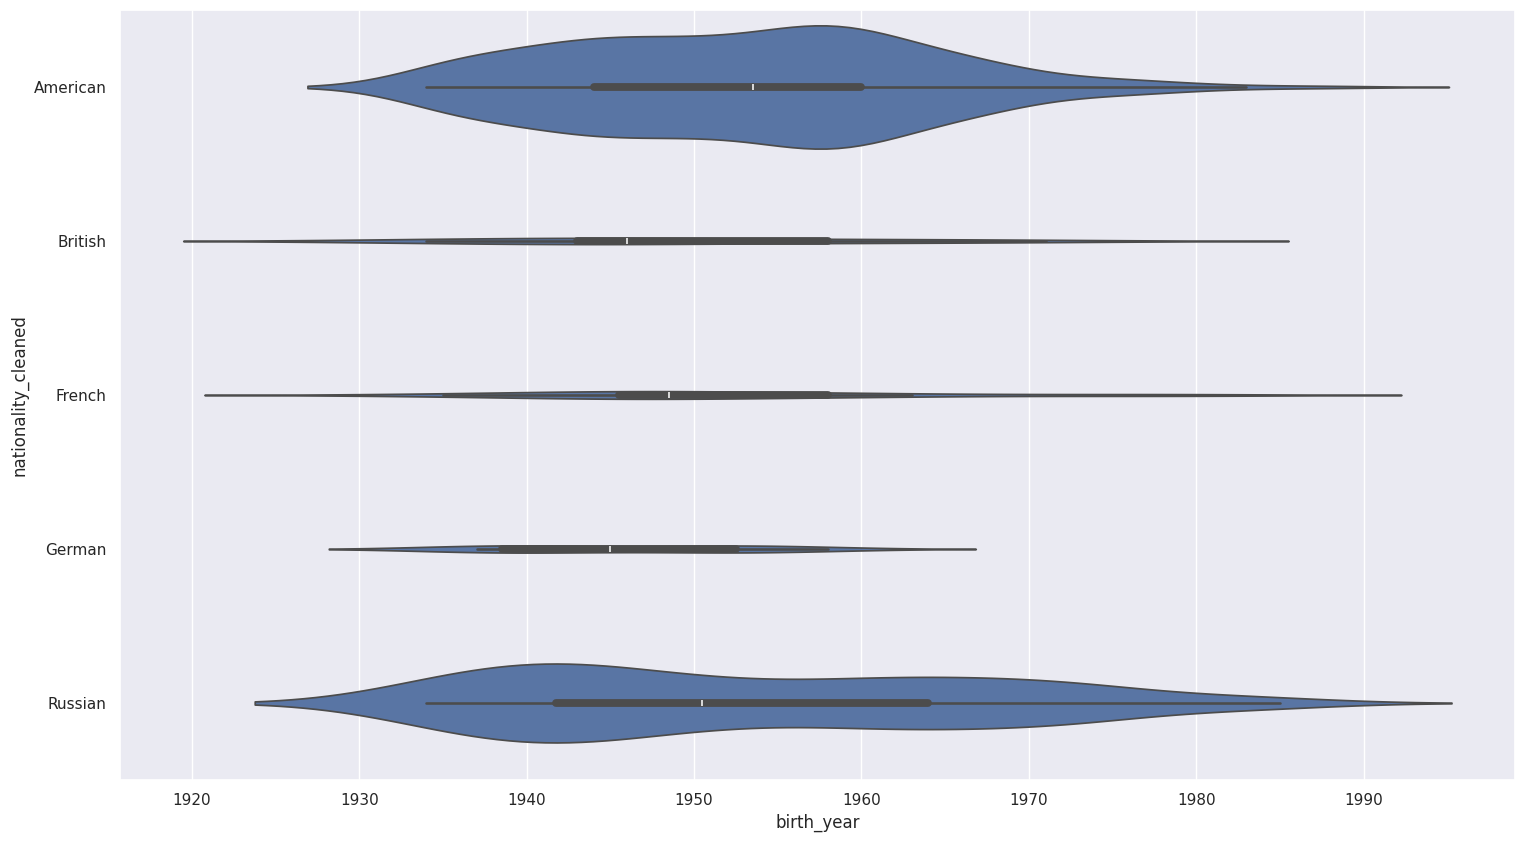

In [32]:
ax2 = sns.violinplot(y='nationality_cleaned', x='birth_year', data=c_df, scale='count')

In [33]:
fig.tight_layout()
plt.savefig('pictures/nationality_cleaned_birth_year_20241209.png')
plt.show()

<Figure size 1800x1000 with 0 Axes>

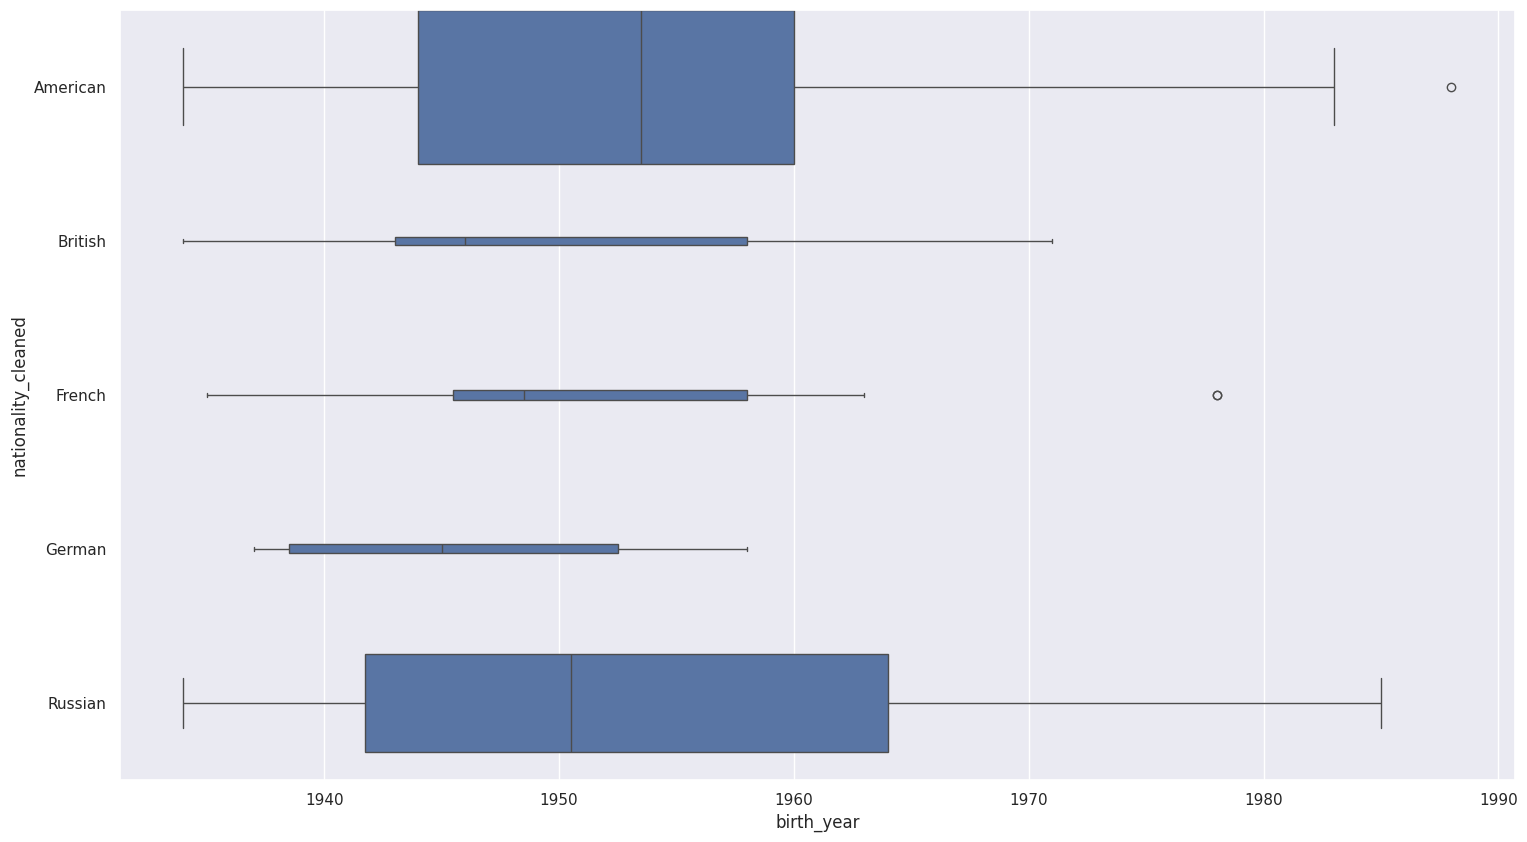

In [34]:
counts = dc_df.effectif_tot
total = float(sum(counts))
widths = [c / max(counts) for c in counts]

sns.boxplot(y=c_df["nationality_cleaned"], x=c_df.birth_year, width=widths)
plt.show()

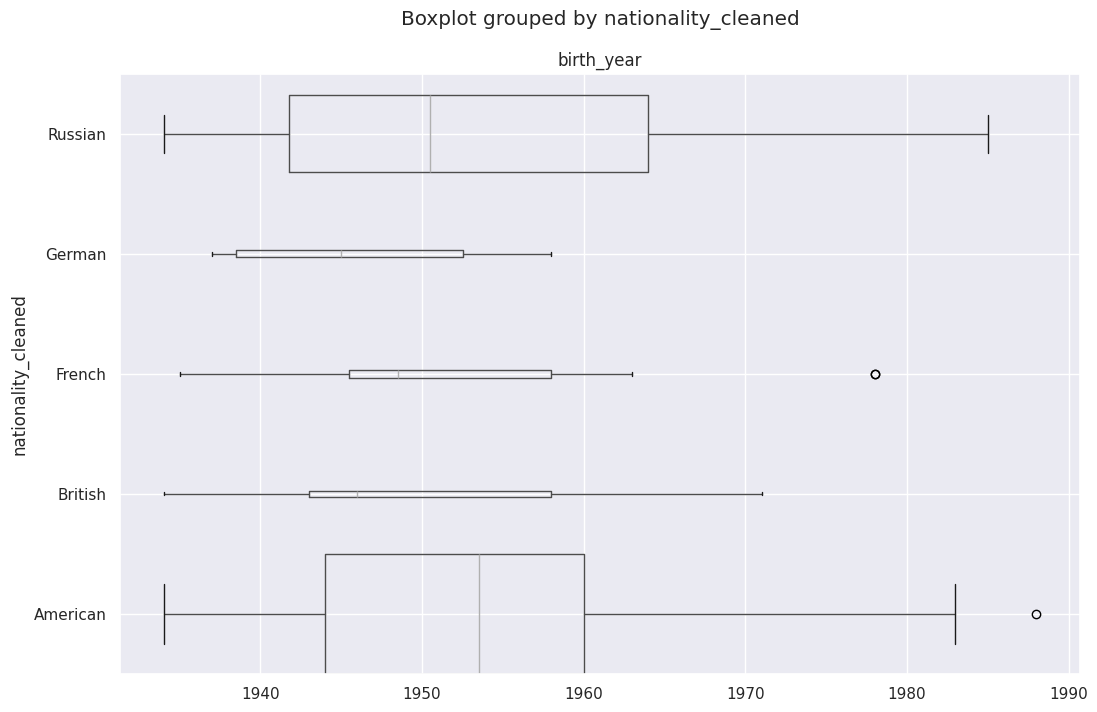

In [35]:
c_df.sort_values(by='nationality_cleaned', ascending=True).boxplot(column='birth_year', by='nationality_cleaned', 
                                                                  vert=False, widths=widths, figsize=(12, 8))
plt.show()

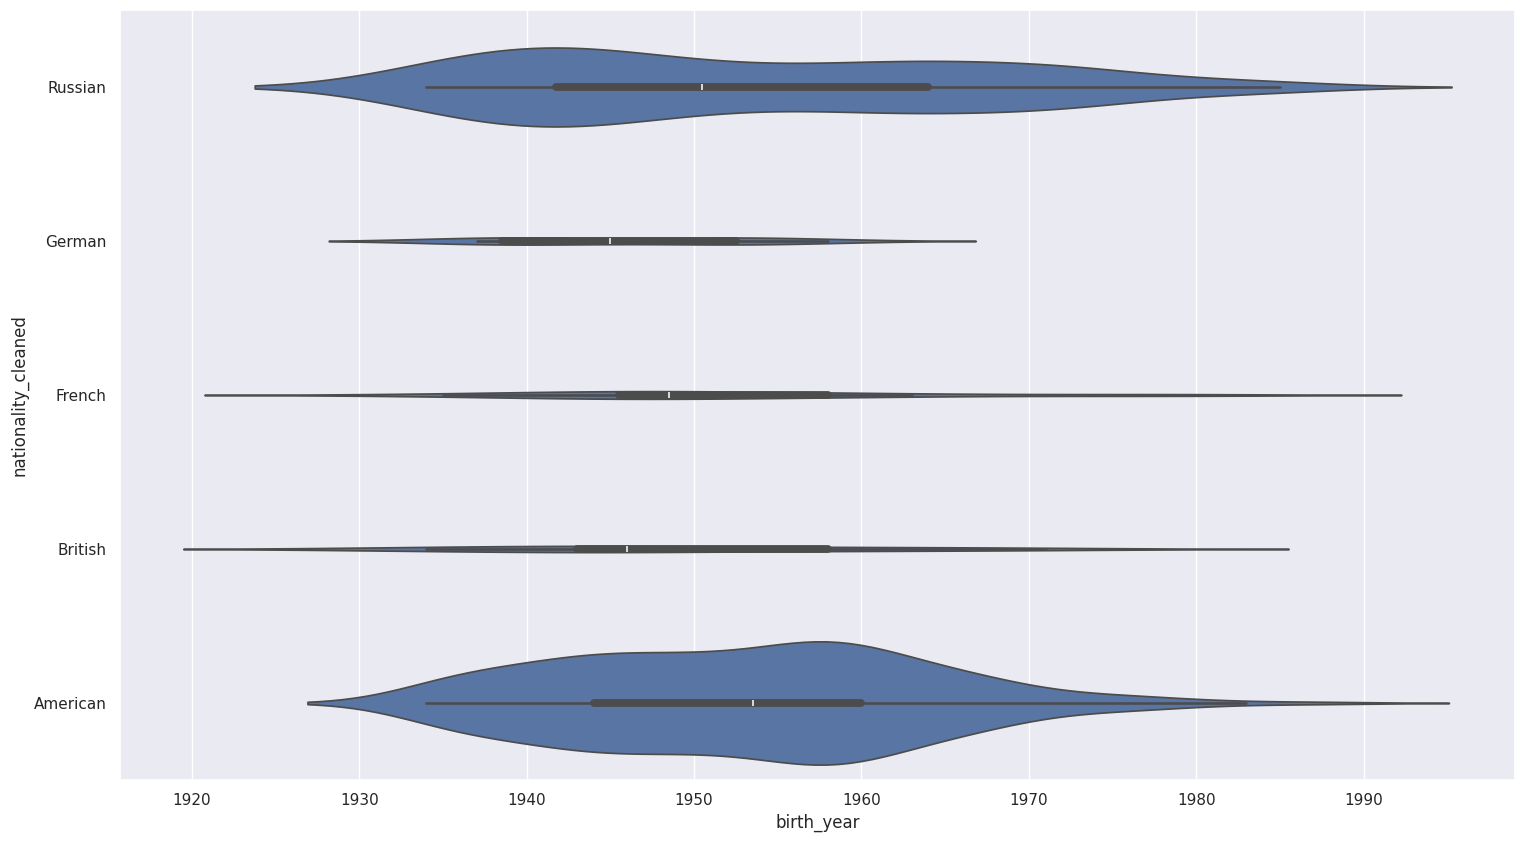

In [36]:
sns.set_theme(rc={'figure.figsize': (18, 10)})
sns.violinplot(y='nationality_cleaned', x='birth_year', density_norm='count', data=c_df.sort_values(by='nationality_cleaned', ascending=False))
plt.show()